In [1]:
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
from time import time
import sys, os

In [2]:
TRAIN_PATH = "./data/train/images"
TEST_PATH  = "./data/test/images"
DIR_TRAIN = './data/train'
DIR_TEST = './data/test'

In [3]:
df = pd.read_csv('coord_train.csv')
landmarks = pd.read_csv(os.path.join(DIR_TRAIN, 'landmarks.csv'))

In [4]:
landmarks

,filename,Point_M0_X,Point_M0_Y,Point_M1_X,Point_M1_Y,Point_M2_X,Point_M2_Y,Point_M3_X,Point_M3_Y,Point_M4_X,...,Point_M189_X,Point_M189_Y,Point_M190_X,Point_M190_Y,Point_M191_X,Point_M191_Y,Point_M192_X,Point_M192_Y,Point_M193_X,Point_M193_Y
0,100032540_1.jpg,565,758,564,781,563,805,566,829,569,...,689,577,707,581,724,586,741,592,760,595
1,1012675629_1.jpg,428,425,429,442,430,460,432,480,434,...,563,316,575,320,587,324,598,328,611,330
2,118736691_1.jpg,497,643,502,677,507,713,519,750,527,...,893,412,931,420,968,430,1007,434,1043,422
3,2365877276_1.jpg,26,328,30,346,35,366,41,384,47,...,145,217,165,216,183,213,202,210,219,204
4,2366695522_1.jpg,87,778,89,811,92,844,100,879,110,...,277,533,310,534,341,537,372,542,403,537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2360524256_1.jpg,331,447,331,462,331,476,331,492,331,...,418,357,426,358,435,358,443,359,451,360
1996,2361275920_1.jpg,292,435,291,449,292,464,292,479,292,...,425,373,436,374,448,375,459,377,470,375
1997,2362828916_1.jpg,1483,1690,1493,1752,1508,1812,1528,1877,1551,...,1517,1413,1546,1414,1573,1420,1599,1429,1624,1438
1998,2364435605_1.jpg,-64,1497,-55,1595,-54,1696,-57,1800,-55,...,680,875,760,882,837,895,917,901,1000,903


In [5]:
df

,file_name,width,height,width_scale,height_scale,id_face,top_x,top_y,bottom_x,bottom_y,point_0_x,point_0_y,point_1_x,point_1_y,point_2_x,point_2_y,point_3_x,point_3_y,point_4_x,point_4_y
0,100032540_1.jpg,1618,1522,544,512,0,189.284393,122.337326,367.703308,357.458069,230.530609,215.221130,312.132202,217.425049,259.953583,246.492645,226.014008,299.916077,297.224243,302.923523
1,100040721_1.jpg,715,704,520,512,0,186.173904,119.369270,334.528625,317.173798,229.697083,192.156998,296.304871,194.941620,261.728119,228.059814,229.253464,263.812073,286.104218,267.337311
2,100040721_2.jpg,648,649,512,512,0,175.690567,118.525772,331.619934,333.921509,241.348038,198.984375,308.552063,203.055481,288.220551,232.975906,244.581696,275.617737,302.887817,279.707458
3,1002681492_1.jpg,1024,681,769,512,0,234.225662,60.716702,504.584290,386.580353,314.182617,193.334244,439.777130,208.653854,372.089355,260.098328,313.528229,308.244263,408.474548,320.374756
4,1004467229_1.jpg,562,452,636,512,0,228.650772,44.924831,415.995697,299.188324,281.261902,126.796768,362.808167,148.636597,300.145508,182.983444,260.957153,221.157135,335.112488,241.002762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2966783423_1.jpg,2910,1940,768,512,0,278.926758,77.358551,518.091797,455.034515,326.690186,220.262268,434.526825,228.753571,370.514038,309.178833,319.597321,344.973175,441.404114,355.064453
2461,296814969_1.jpg,1037,1027,516,512,0,185.356277,97.932632,353.841034,334.448975,226.352936,194.176788,299.469360,195.500641,261.755920,240.744659,228.783234,269.737488,307.271729,269.296204
2462,296814969_1.jpg,1037,1027,516,512,1,107.368362,362.371216,246.745346,565.491516,152.413116,447.332855,215.628021,441.313538,195.687439,490.151917,162.592102,520.500305,217.509888,512.135132
2463,296814969_2.jpg,969,969,512,512,0,181.965576,116.750977,343.661499,334.730957,236.513824,194.309631,306.568024,213.709488,262.831238,256.485596,217.030609,266.683472,285.101868,287.632080


In [6]:
df['width_face'] = abs(df['bottom_x'] - df['top_x'])
df['height_face'] = abs(df['bottom_y'] - df['top_y'])
df["f_x"] = df['width']/df['width_scale']
df["f_y"] = df['height']/df['height_scale']

In [7]:
# df['top_x'] = df['top_x'] - df['width_face']/4
# df['bottom_x'] = df['bottom_x'] + df['width_face']/4
# df['top_y'] = df['top_y'] - df['height_face']/4
# df['bottom_y'] = df['bottom_y'] + df['height_face']/4

In [8]:
df['top_x'] = df['top_x']*df["f_x"]
df['bottom_x'] = df['bottom_x']*df["f_x"]
df['top_y'] = df['top_y']*df["f_y"]
df['bottom_y'] = df['bottom_y']*df["f_y"]

In [9]:
df['width_face'] = abs(df['bottom_x'] - df['top_x'])
df['height_face'] = abs(df['bottom_y'] - df['top_y'])

In [10]:
df['centre_face_x'] = df['top_x'] + df['width_face']//2
df['centre_face_y'] = df['top_y'] + df['height_face']//2

In [11]:
df = pd.merge(df, landmarks[['filename', 'Point_M49_X', 'Point_M49_Y']], left_on='file_name', right_on='filename' )

In [12]:
df['dist_centre'] = ((df['Point_M49_X'] - df['centre_face_x'])**2 + (df['Point_M49_Y'] - df['centre_face_y'])**2)**0.5

In [13]:
df = df.groupby(['file_name']).apply(lambda x: x.sort_values(["dist_centre"])).reset_index(drop=True)

In [14]:
df

,file_name,width,height,width_scale,height_scale,id_face,top_x,top_y,bottom_x,bottom_y,...,width_face,height_face,f_x,f_y,centre_face_x,centre_face_y,filename,Point_M49_X,Point_M49_Y,dist_centre
0,100032540_1.jpg,1618,1522,544,512,0,562.981890,363.666817,1093.646972,1062.599962,...,530.665081,698.933146,2.974265,2.972656,827.981890,712.666817,100032540_1.jpg,788,812,107.077695
1,100040721_1.jpg,715,704,520,512,0,255.989119,164.132747,459.976860,436.113972,...,203.987741,271.981225,1.375000,1.375000,356.989119,299.132747,100040721_1.jpg,359,330,30.932685
2,100040721_2.jpg,648,649,512,512,0,222.358374,150.240676,419.706479,423.271600,...,197.348105,273.030924,1.265625,1.267578,320.358374,286.240676,100040721_2.jpg,354,314,43.615812
3,1002681492_1.jpg,1024,681,769,512,0,311.894770,80.757956,671.904178,514.182071,...,360.009408,433.424114,1.331599,1.330078,491.894770,296.757956,1002681492_1.jpg,486,373,76.469586
4,1004467229_1.jpg,562,452,636,512,0,202.046751,39.660203,367.593682,264.127192,...,165.546931,224.466990,0.883648,0.882812,284.046751,151.660203,1004467229_1.jpg,273,180,30.416687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2966783423_1.jpg,2910,1940,768,512,0,1056.870918,293.116385,1963.082199,1724.154218,...,906.211281,1431.037834,3.789062,3.789062,1509.870918,1008.116385,2966783423_1.jpg,1420,1239,247.757998
2461,296814969_1.jpg,1037,1027,516,512,0,372.508643,196.439089,711.110760,670.857611,...,338.602117,474.418522,2.009690,2.005859,541.508643,433.439089,296814969_1.jpg,537,507,73.698952
2462,296814969_1.jpg,1037,1027,516,512,1,215.777116,726.865700,495.881635,1134.296459,...,280.104519,407.430759,2.009690,2.005859,355.777116,929.865700,296814969_1.jpg,537,507,460.062098
2463,296814969_2.jpg,969,969,512,512,0,344.384069,220.960344,650.406235,633.504487,...,306.022166,412.544143,1.892578,1.892578,497.384069,426.960344,296814969_2.jpg,488,506,79.594773


In [15]:
for id_point in range(5):
    df[f'point_{id_point}_x'] = df[f'point_{id_point}_x']*df["f_x"]
    df[f'point_{id_point}_y'] = df[f'point_{id_point}_y']*df["f_y"]

In [24]:
df_clear = df.drop_duplicates('file_name', keep ='first')

In [25]:
df_clear = df_clear.drop(['width_scale', 'height_scale', 'f_x', 'f_y', 'width_face', 'height_face', 'dist_centre', 'centre_face_x', 'centre_face_y', 'Point_M49_X', 'Point_M49_Y', 'filename'], axis=1)

In [26]:
df_clear.to_csv('clear_coord_train.csv', index=False)

In [27]:
df_clear[df_clear['file_name']=='2070105355_2.jpg']

,file_name,width,height,id_face,top_x,top_y,bottom_x,bottom_y,point_0_x,point_0_y,point_1_x,point_1_y,point_2_x,point_2_y,point_3_x,point_3_y,point_4_x,point_4_y
597,2070105355_2.jpg,1210,1209,2,394.276348,294.515818,781.984437,808.688081,528.263534,476.199346,700.615815,517.391219,602.848901,584.296297,487.797968,659.595014,656.138989,695.430662


In [21]:
df[df['file_name']=='2070105355_2.jpg']

,file_name,width,height,width_scale,height_scale,id_face,top_x,top_y,bottom_x,bottom_y,...,width_face,height_face,f_x,f_y,centre_face_x,centre_face_y,filename,Point_M49_X,Point_M49_Y,dist_centre
597,2070105355_2.jpg,1210,1209,512,512,2,394.276348,294.515818,781.984437,808.688081,...,387.708088,514.172263,2.363281,2.361328,587.276348,551.515818,2070105355_2.jpg,589,616,64.507214
598,2070105355_2.jpg,1210,1209,512,512,1,-120.273908,517.135255,347.159186,1098.494052,...,467.433094,581.358797,2.363281,2.361328,112.726092,807.135255,2070105355_2.jpg,589,616,513.195403
599,2070105355_2.jpg,1210,1209,512,512,0,900.527210,492.140941,1565.655221,1189.386233,...,665.128011,697.245291,2.363281,2.361328,1232.527210,840.140941,2070105355_2.jpg,589,616,681.444371


In [22]:
row = df.loc[597]
img = Image.open(os.path.join(TRAIN_PATH, row['file_name']))
draw = ImageDraw.Draw(img)
box = [row['top_x'], row['top_y'], row['bottom_x'], row['bottom_y']]
img_crop = img.crop(box)
point_0 = [row["point_0_x"], row["point_0_y"]]
point_1 = [row["point_1_x"], row["point_1_y"]]
point_2 = [row["point_2_x"], row["point_2_y"]]
point_3 = [row["point_3_x"], row["point_3_y"]]
point_4 = [row["point_4_x"], row["point_4_y"]]

point_centre = [row["centre_face_x"], row["centre_face_y"]]

r = 5
x, y = point_0
draw.ellipse((x-r, y-r, x+r, y+r), fill=(255,0,0,0))
x, y = point_1
draw.ellipse((x-r, y-r, x+r, y+r), fill=(255,0,0,0))
x, y = point_2
draw.ellipse((x-r, y-r, x+r, y+r), fill=(255,0,0,0))
x, y = point_3
draw.ellipse((x-r, y-r, x+r, y+r), fill=(255,0,0,0))
x, y = point_4
draw.ellipse((x-r, y-r, x+r, y+r), fill=(255,0,0,0))
x, y = point_centre
draw.ellipse((x-r, y-r, x+r, y+r), fill=(0,0,255,0))

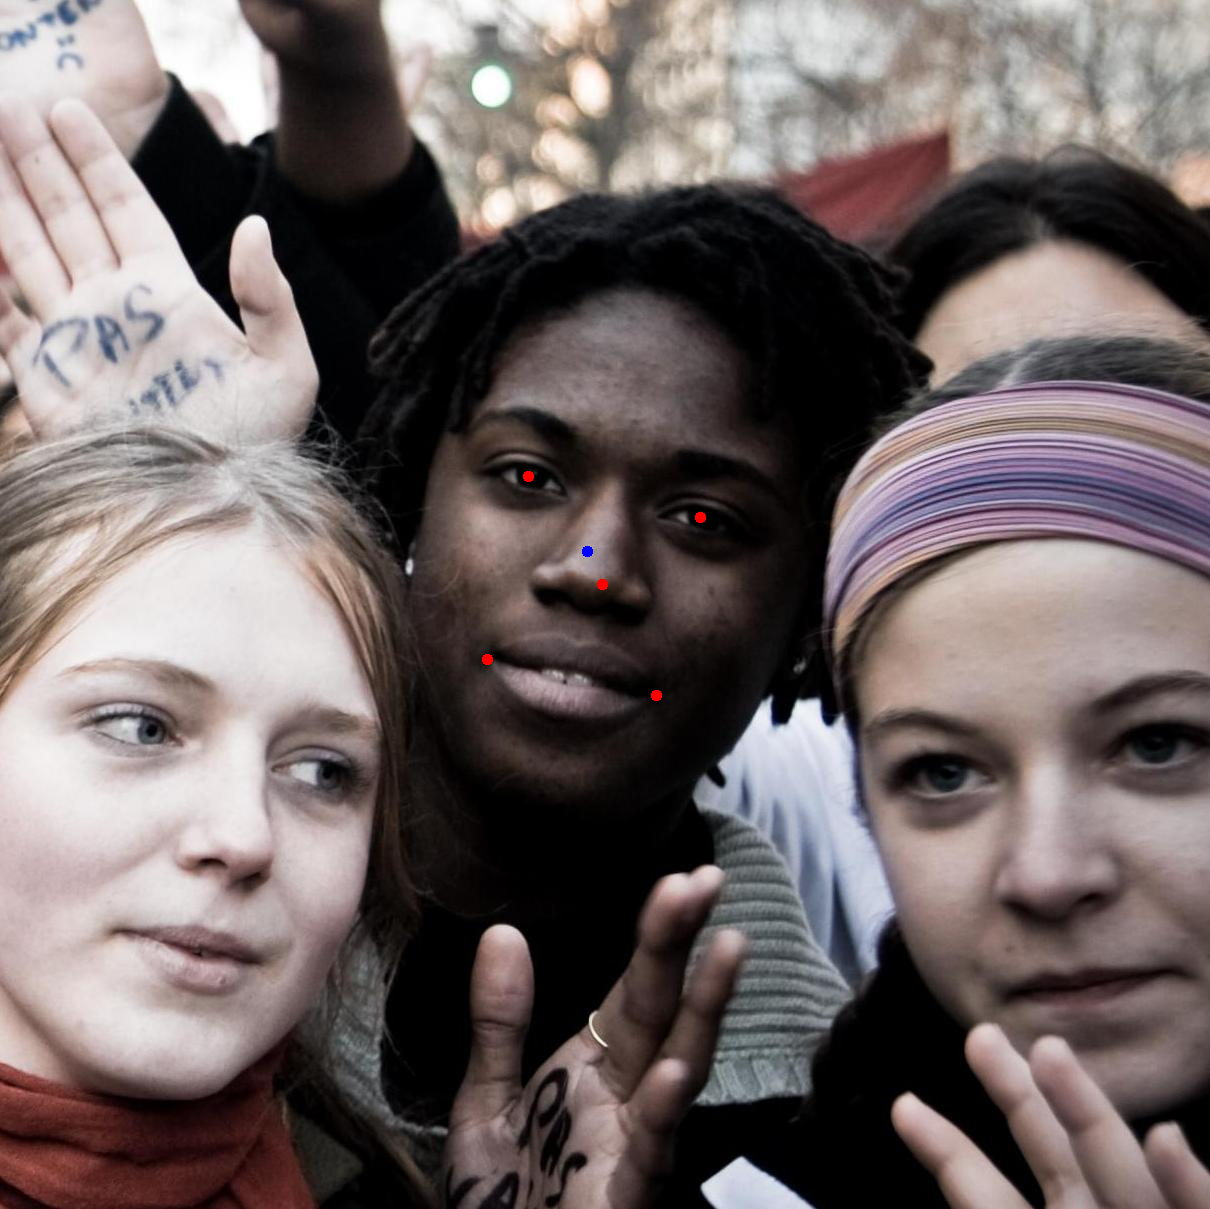

In [23]:
img

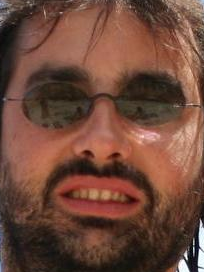

In [18]:
img_crop